In [29]:
#inicio de la  conexión a una base de datos
import mysql.connector 
#estamos estableciendo la conexión a la base de datos MySQL mediante la función connect() del módulo mysql.connector, y pasamos los parametros
mydb= mysql.connector.connect(
    host= "localhost",
    user= "root",
    password= "12345678",
    database="spring4",
    port="3306")
print(mydb) 




In [ ]:
!pip install seaborn



In [30]:
#importamos libreria a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Crear un cursor, q es el intermediario, un objeto que te permite interactuar con la base de datos.
cursor = mydb.cursor() # se tiene mydb  que representa la conexión a tu base de datos, y crea el cursor asociado a la conexión de la base de datos para realizar consultas

# Consultar y cargar 'products' en un DataFrame
#Con esta instrucción, el cursor que es el intermediario entre bd  y el codigo, envía la consulta a la base de datos para que devuelva toda la información de la tabla solicitada
#para cada caso
cursor.execute('SELECT * FROM products') 
df_products = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])

# Consultar y cargar 'productos_desglosados' en un DataFrame
cursor.execute('SELECT * FROM productos_desglosados')
df_productos_desglosados = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])

# Consultar y cargar 'transactions' en un DataFrame
cursor.execute('SELECT * FROM transactions')
df_transactions = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])

# Consultar y cargar 'companies' en un DataFrame
cursor.execute('SELECT * FROM companies')
df_companies = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])

# Consultar y cargar 'users' en un DataFrame
cursor.execute('SELECT * FROM users')
df_users = pd.DataFrame(cursor.fetchall(), columns=[i[0] for i in cursor.description])

# Cerrar el cursor y la conexión
cursor.close()







True

Ejercicio 1 Variable Numerica
Tome la tabla Producto, de ella seleccione la columna price, la misma tiene el simbolo $ debo hacer los cambios para limpiar la informacion

In [59]:
#realice los cambios seleccionando la columna price de mi df_products,


# tipo de datos en la columna 'price'
print(df_products['price'].dtype)

#df_products['price']=df_products['price'].replace('$', '').astype(float) ***
df_products['price'] = df_products['price'].astype(str)

# elimine el símbolo del dólar y lo converti a float
df_products['price'] = df_products['price'].str.replace('$', '', regex=False).astype(float)

# validando
print(df_products['price'].head())





float64
0    161.11
1      9.24
2    171.13
3     71.89
4    171.22
Name: price, dtype: float64


In [60]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


*** EJERCICIOS ***

Utilice replace para buscar y eliminar el símbolo de dólar y remplazar por cadena vacia,luego con el astype convierto los valores en la columna price a tipo de dato float.
Debido que tuve problemas con la anterior(***) forma esta comentado, busque otra forma de realizarlo, utilizando el srt a caracteres espcificos ($) y asi aplicar métodos de cadena a columnas de texto en mi dataframe, para limpiar los datos ya q panda ve el símbolo de dólar como una cadena, el regex=False para simples eliminaciones y luego el astype  convertir la cadena resultante a un formato numerico en este caso float



Realice un histograma para observar cómo se distribuyen los valores, y elrango donde se encuentran

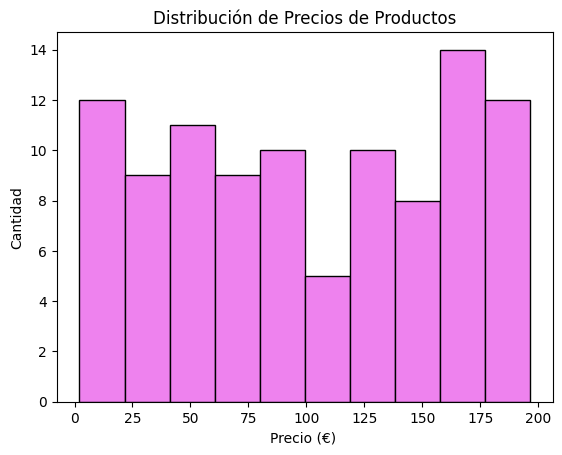

In [35]:
#Es la función que crea un histograma, 
plt.hist(df_products['price'], bins=10
         , color='violet', edgecolor='black')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio (€) ')
plt.ylabel('Cantidad')

plt.show()

En la gráfica presentada, que ilustra la distribución de precios de productos, se puede observar una notable desigualdad entre los precios y su frecuencia de salida. A continuación, se detallan los hallazgos más relevantes:
La gráfica muestra que la mayoría de los productos tienen precios en los rangos de 0-25 euros y 150-200 euros. Esto indica que los productos más económicos son los que más se venden, probablemente debido a su accesibilidad para una mayor cantidad de clientes. Por otro lado, los productos más caros también están experimentando una buena frecuencia de venta, lo que podría sugerir que hay un tramo de clientes dispuesto a invertir en productos de mayor valor.
Sin embargo, se puede  observar que los productos en el rango de precios medio (entre 25 y 150 euros) no están generando ventas significativas. Esto sugiere una posible falta de interés o necesidad en este tramo ,es posible que estos productos no estén siendo bien promocionados o que no se alineen con las necesidades del mercado.
Se deben evaluar los productos en el rango de 25 a 150 euros para identificar si es necesario ajustar precios, mejorar características o reforzar la publicidad para hacerlos más atractivos.
Implementar campañas de marketing específicas dirigidas a los consumidores de precios medios, resaltando el valor agregado de estos productos.
Incorporar opciones que se alineen mejor con las preferencias de los consumidores.
Realizar un estudio de mercado para comprender mejor las necesidades de los consumidores en este rango de precios y adaptar la oferta.




Ejercicio 2 Dos variables numericas

In [61]:
#El peso es de tipo OBJECT con el astype convierto los valores a tipo de dato float.
df_products['weight'] = df_products['weight'].astype(float)
df_products
df_products.info()
df_products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3.0,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
97,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93
98,99,the duel,151.78,#212121,1.5,WH--94


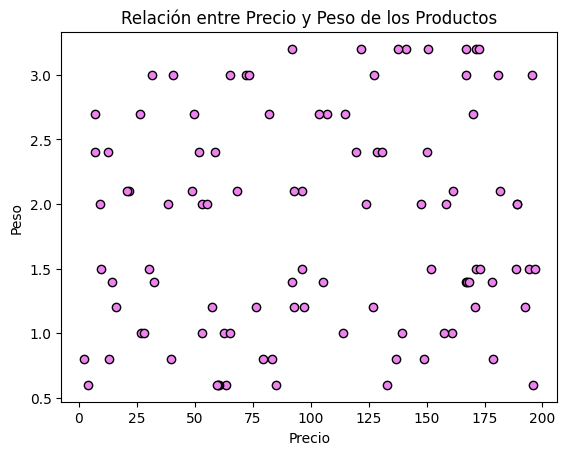

In [62]:
#Grafico de dispersio
# genera un grafico de dispersion 
plt.scatter(df_products['price'], df_products['weight'],color='violet',edgecolors='black')
plt.title('Relación entre Precio y Peso de los Productos')
plt.xlabel('Precio')
plt.ylabel('Peso')
plt.show()

Los puntos están dispersos por el gráfico, por lo tanto no se ve, o no hay una relación lineal clara entre el precio y el peso de los productos. Esto significa que el precio no necesariamente aumenta o disminuye de manera predecible en función del peso; hay una variedad de precios, desde 0 hasta 200, y pesos que van de 0.5 a 3.0. 
Algunos agrupamientos pueden observarse en ciertas áreas, especialmente alrededor de ciertos pesos, se podria decr que puede haber productos con características similares que tienden a tener precios comparables, pero no existe una relación directa entre el precio y el peso de los productos, lo que podría implicar otros factores, como la calidad, marca o características del producto, en la determinación del precio.
La dispersión de los datos se visualiza que algunos productos ligeros tienen precios altos y viceversa, lo que podría ser indicativo de productos de lujo o de marca que no necesariamente dependen del peso.
Se considera agrupar los productos en diferentes categorías según su peso y precio para identificar tendencias y oportunidades de mercado. Esto podría ayudar a personalizar estrategias de marketing y fijación de precios. 
se consideraria tambien revisar el inventario para identificar productos que no se venden bien, si algunos productos tienen un peso elevado y precios altos, puede ser útil analizar si hay cambios que se puedan hacer para mejorar su atractivo.


Ejercicio 3 Una variable categórica.

declined
0    500
1     87
Name: count, dtype: int64


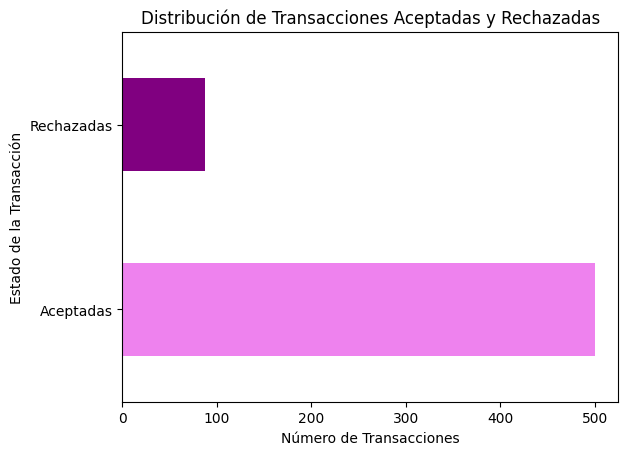

In [63]:
# Contar el número de transacciones por categoría
conteo_declined = df_transactions['declined'].value_counts()

print(conteo_declined)
# Grafica
conteo_declined.plot(kind='barh', color=['violet', 'purple'])

# Añadir etiquetas y título
plt.xlabel('Número de Transacciones')
plt.ylabel('Estado de la Transacción')
plt.title('Distribución de Transacciones Aceptadas y Rechazadas')

# Configurar las etiquetas del eje Y ya que el gráfico es horizontal
plt.yticks(ticks=range(len(conteo_declined.index)), labels=['Aceptadas', 'Rechazadas'])

# Mostrar el gráfico
plt.show()


Se puede observar que la mayoría de las transacciones son Aceptadas (representadas por la barra clara), con un número considerablemente mayor en comparación con las transacciones Rechazadas (representadas por la barra morada), esto sugiere un rendimiento positivo en términos de aceptación de transacciones, lo que podría ser un indicador de la eficacia del sistema de procesamiento de transacciones.
Al observar el gráfico, se puede notar que las transacciones Rechazadas son significativamente menores en número, lo que puede indicar que los sistemas de evaluación de riesgos o de verificación de transacciones están funcionando adecuadamente para minimizar las transacciones fraudulentas o no deseadas, se podria decir, que una baja tasa de transacciones rechazadas puede ser beneficioso para la experiencia del usuario, ya que significa que los clientes están más satisfechos con el proceso de compra. Sin embargo, también puede ser necesario revisar los criterios para rechazar transacciones para asegurarse de que no se estén omitiendo transacciones potencialmente riesgosas.
Es por ello que se debe identificar patrones o causas comunes, revisar las razones por las cuales las transacciones fueron rechazadas (problemas de validación, límites de crédito, etc.).
Si las transacciones rechazadas se deben a problemas sistemáticos (errores técnicos o confusiones en la validación de datos), se considera implementar mejoras en el sistema para minimizar estos problemas , revisando las reglas y criterios de validación de transacciones para asegurar de que no son demasiado restrictivos y  que sean claros y se alineen con las expectativas de los usuarios, tambien se consideraria evaluar, si es posible, las políticas que rigen la aceptación de transacciones para garantizar un equilibrio entre la prevención del fraude y la satisfacción del cliente.
Monitorear y ajustar continuamente estos procesos garantizará un rendimiento óptimo.




Ejercicio4 Una categorica y una numerica

In [64]:

df_transactions['amount'] = df_transactions['amount'].astype(float) 
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           587 non-null    object 
 1   card_id      587 non-null    object 
 2   business_id  587 non-null    object 
 3   timestamp    587 non-null    object 
 4   amount       587 non-null    float64
 5   declined     587 non-null    object 
 6   product_ids  587 non-null    object 
 7   user_id      587 non-null    object 
 8   lat          587 non-null    object 
 9   longitude    587 non-null    object 
dtypes: float64(1), object(9)
memory usage: 46.0+ KB


country
Germany           28815.98
United Kingdom    27073.17
Sweden            20588.59
Norway            17286.71
Ireland           17193.12
Canada            16448.52
United States      5256.05
Netherlands        4554.32
Italy              3427.03
Belgium            2965.92
Australia          2784.63
New Zealand        2445.05
France             1075.19
China               682.67
Spain               106.80
Name: amount, dtype: float64


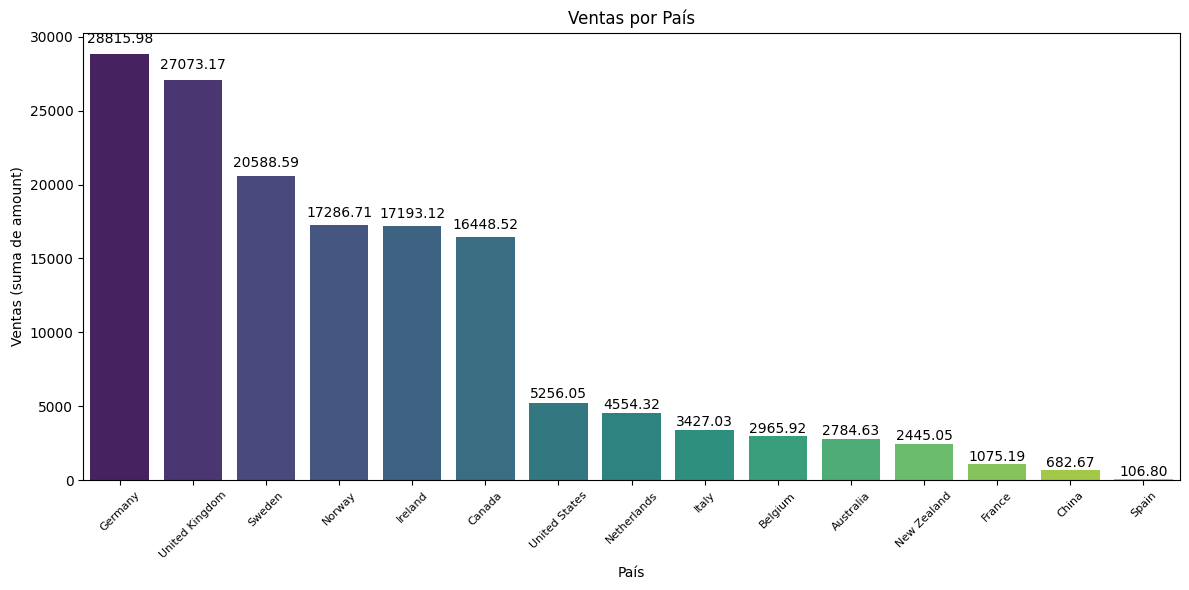

In [65]:

# Unir DataFrames
pd_merge = df_transactions.merge(df_companies[['company_id', 'country']], left_on='business_id', right_on='company_id')

# Agrupar por país y sumar las ventas, y luego ordenar de mayor a menor
ventas_pais = pd_merge.groupby('country')['amount'].sum().sort_values(ascending=False)
print(ventas_pais)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_pais.index, y=ventas_pais.values, palette='viridis', hue=ventas_pais.index.tolist(), legend=False)

# Añadir montos encima de cada barra con un pequeño desplazamiento
for index, value in enumerate(ventas_pais.values):
    plt.text(index, value + value * 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Ventas por País')
plt.xlabel('País')
plt.ylabel('Ventas (suma de amount)')
plt.xticks(rotation=45, fontsize=8)  # Rotar etiquetas del eje x para mejor legibilidad y cambiar el tamaño de fuente
plt.tight_layout()  # Ajusta automáticamente el espacio para evitar superposición
plt.show()


En este gráfico se muestra la suma total de las ventas efectuadas por cada país,la intención es poder formarse una idea sobre la comparativa, son 15 paises ordenados de mayor a menor el top son los 2 Países con mayor venta Alemania se posiciona como el país con las ventas más altas, alcanzando un total de 28815,98, esto indica que Alemania es un mercado clave sigue de segundo Reino Unido con 270073,17, lo que también sugiere una fuerte demanda en este país.
El rango medio de ventas,los países como Suecia, Noruega e Irlanda muestran ventas en un rango medio, con valores entre 17000 y 21000. Esto sugiere un mercado bueno, aunque no tan fuerte como Alemania y el Reino Unido,Canadá tiene una cifra notable de 16448,52, indicando un mercado significativo en América del Norte.
Se observa de igual forma un bajo Rendimiento en Otros Mercados como Estados Unidos, Países Bajos, Italia y Bélgica, presentan ventas considerablemente más bajas entre 2000 y 5000, esto podría señalar un área de mejora o la necesidad de estrategias de marketing más enfocadas en estos mercados.
Por otro lado se encuentran los mercados con ventas minimas aqui se encuentran China, Francia y España tienen las cifras más bajas, con ventas que van desde 106.80 en España hasta 682,67 en China. Esto podría ser indicativo de una falta de presencia en el mercado o una baja aceptación del producto en esos países.
Se sugiere focalizar las estrategias en Alemania y el Reino Unido, dada la alta demanda, realizar mas marketing que prioricen estos mercados, como campañas publicitarias específicas o alianzas locales.
Para los países con ventas más bajas, se recomienda llevar a cabo investigaciones de mercado para entender mejor por qué los productos no están teniendo el mismo éxito. Esto podría incluir encuestas a consumidores, análisis de competencia y estudios de tendencias locales,
Para paises como Francia, China y españa  invertir en marketing, y realizar mas promociones para aumentar la visibilidad de sus productos en el mercado.


Ejercicio 5 dos variables categoricas

           country  count
0        Australia      6
1          Belgium      5
2           Canada      4
3            China      1
4           France      3
5          Germany      7
6          Ireland      6
7            Italy      8
8      Netherlands      8
9      New Zealand      5
10          Norway      7
11           Spain      1
12          Sweden     11
13  United Kingdom      7
14   United States      8


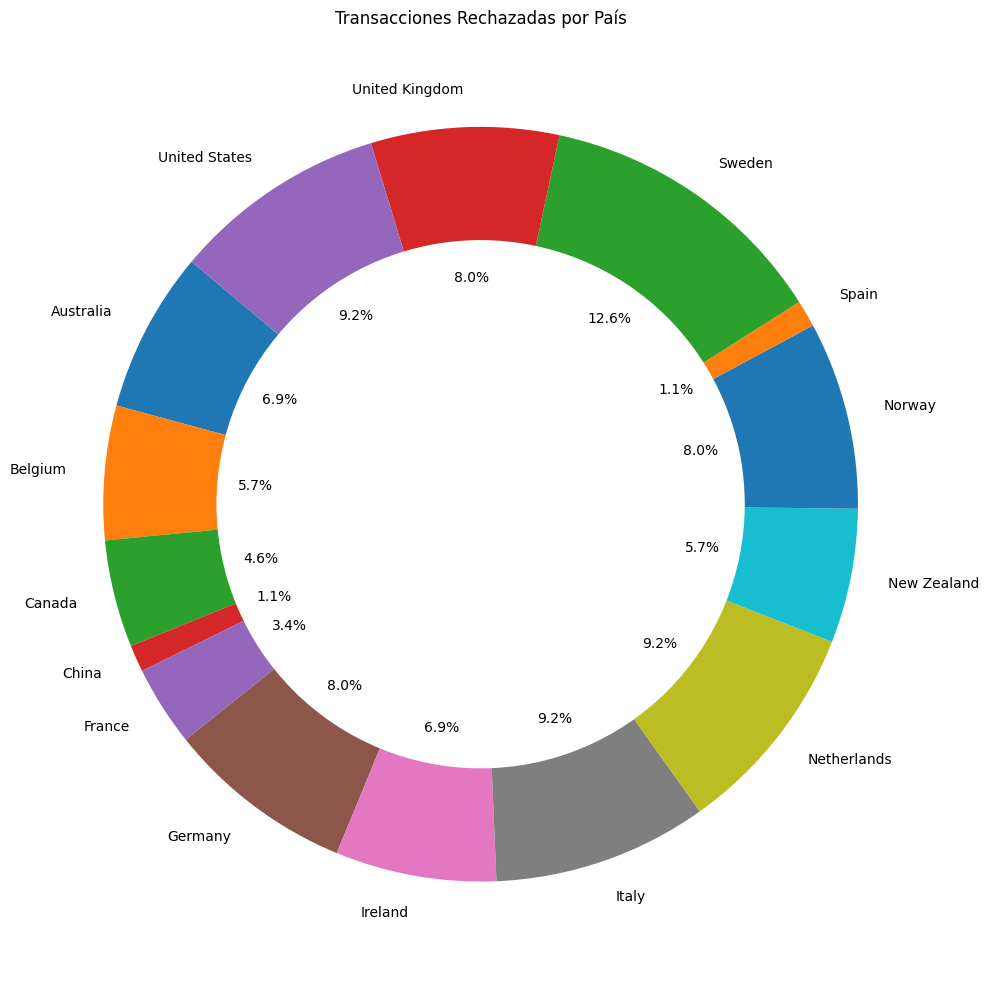

In [42]:


# Realizar la unión de transacción y compañia 
df_combinat = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

# Convertir 'declined' en categórica
df_combinat['declined'] = df_combinat['declined'].astype(int)  # Convierte a entero si es necesario
df_combinat['estado_transaccion'] = df_combinat['declined'].map({0: 'Aprobada', 1: 'Rechazada'}).astype('category')

# Contar transacciones rechazadas por país
transacciones_rechazadas = df_combinat[df_combinat['declined'] == 1].groupby('country').size().reset_index(name='count')

# Mostrar el conteo de transacciones rechazadas por país
print(transacciones_rechazadas)

# Graficar un gráfico de dona (pie chart)
plt.figure(figsize=(10, 10))
plt.pie(transacciones_rechazadas['count'], labels=transacciones_rechazadas['country'], autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Círculo central para crear el efecto de dona
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Transacciones Rechazadas por País')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle
plt.tight_layout()
plt.show()


En este ejercicio se pretende conocer las transacciones declinadas que se han registrado y cómo se distribuyen entre paises. Las variables categóricas que se han elegido son country del dataframe companies y declined del dataframe transactions.
Para mostrar de manera clara la distribución de las transacciones declinadas por las ubicaciones de las empresas se ha elegido la dona.
Observamos que los países cuyas empresas han registrado mayor número de transacciones declinadas son Suecia 12.6%, Países Bajos, Italia y Estados Unidos, cada uno con un 9.2%. por otro lado vemos que España y China han acumulado un menor número de transacciones declinadas.
Este gráfico nos proporciona una representación clara de cómo se distribuyen las transacciones rechazadas por país. Identificar los países con tasas más altas de rechazos puede ayudar a una empresa a centrar sus esfuerzos en la mejora de procesos y en la identificación de factores que contribuyen a las transacciones rechazadas, lo que, en última instancia, puede conducir a un mejor rendimiento comercial.


Ejercicio 6 tres variables 

estado_transaccion  Aprobada  Rechazada
country                                
Australia                6.0        6.0
Belgium                  8.0        5.0
Canada                  57.0        4.0
China                    2.0        1.0
France                   3.0        3.0
Germany                111.0        7.0
Ireland                 56.0        6.0
Italy                    9.0        8.0
Netherlands             10.0        8.0
New Zealand              6.0        5.0
Norway                  61.0        7.0
Spain                    1.0        1.0
Sweden                  68.0       11.0
United Kingdom          93.0        7.0
United States            9.0        8.0


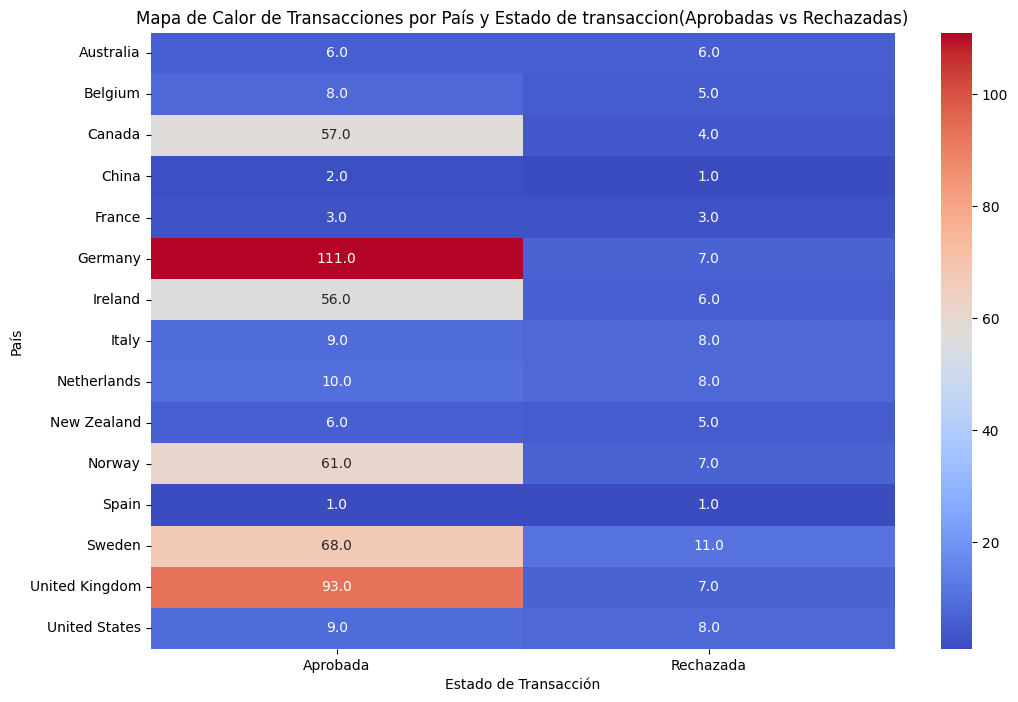

In [43]:


# Contar transacciones por país y estado de la transacción
heatmap_data = df_combinat.groupby(['country', 'estado_transaccion'], observed=False).size().reset_index(name='count')

# Pivotar la tabla para el mapa de calor usando pivot_table
heatmap_pivot = heatmap_data.pivot_table(index='country', columns='estado_transaccion', values='count', fill_value=0, observed=False)
print(heatmap_pivot)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, cmap='coolwarm', fmt='.1f')  # Cambiar 'd' a '.1f'

plt.title('Mapa de Calor de Transacciones por País y Estado de transaccion(Aprobadas vs Rechazadas)')
plt.xlabel('Estado de Transacción')
plt.ylabel('País')
plt.show()





Interpretación:
Para este ejercicio hemos retomado algunas variables que hemos utilizado anteriormente, como son los estados de transacciones y el país . El mapa de calor, nos indica las transacciones (aprobadas y rechazadas)por país  muestra rápidamente en las zonas de mayor saturación de color aquellos países que tienen mayor numero.

Observamos Alemania y Reino Unido se destacan por tener el mayor número de transacciones aprobadas, con 111 y 93 transacciones respectivamente. Sin embargo, en ambos países, el número de transacciones rechazadas también es notablemente bajo en comparación con las aprobadas.Aunque el número de rechazos es bajo, aún existe un pequeño porcentaje de transacciones que no se están procesando correctamente. Podría ser útil investigar las causas de estos rechazos (fraude, problemas técnicos, errores en la información del cliente) para mejorar aún más la tasa de éxito.Sin embargo podrian considerarse mercados sólidos con buenas tasas de éxito en las transacciones.
Estados Unidos e Italia tienen una relación preocupante entre transacciones aprobadas y rechazadas, lo que podría sugerir problemas en los procesos de validación o posibles riesgos asociados en estos mercados, aproximadamente el 50% de las transacciones en ambos países son rechazadas, lo que es significativamente alto en comparación con otros países donde los rechazos son mínimos, debería realizarse una investigación detallada para determinar qué factores están causando estos rechazos (por ejemplo, problemas de validación de tarjetas, problemas de autenticación,  ajustar las reglas para reducir el rechazo de transacciones legítimas, etc.),los datos recolectados pueden ayudar a identificar si los problemas están relacionados con un proceso específico, como la verificación de identidad o las políticas de fraude.
Canadá muestra una alta tasa de aprobación, lo que sugiere que es un mercado con baja tasa de rechazos, lo cual es positivo desde la perspectiva de la eficiencia de las transacciones,parece ser un mercado sólido y eficiente en cuanto a la aprobación de transacciones, lo que es positivo para el crecimiento económico y la estabilidad del mercado de pagos.
Países con un menor número de transacciones, como España y China, podrían requerir un análisis más detallado si se desea aumentar la actividad transaccional o entender el porqué de los bajos volúmenes, esto puede deberse a que las ofertas de productos o servicios podrían no estar adaptadas a las necesidades específicas de los consumidores de España y China, lo que podría disminuir el volumen de transacciones. Se deberia desarrollar estrategias de marketing y productos adaptadas a las preferencias locales, una mayor integración con plataformas sociales ser clave, podría enfocarse en incentivar el comercio electrónico.


Ejercicio 7 graficar un pairplot
Un pairplot es una forma fácil de mirar todas las relaciones entre varias variables, trabaja principalmente con variables numéricas.
Es una función de la librería Seaborn, que es una biblioteca de visualización de datos en Python construida sobre Matplotlib. 

In [66]:
df_transactions['amount']=df_transactions['amount'].astype(float)

type(df_transactions)


pandas.core.frame.DataFrame

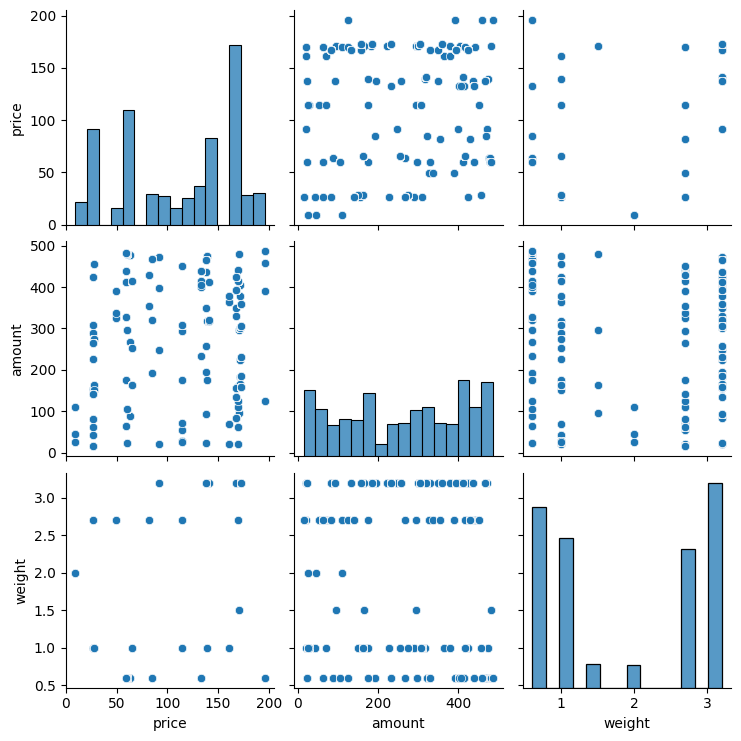

In [67]:

# Convertir ambas columnas a tipo string para asegurar compatibilidad
df_productos_desglosados['product_id'] = df_productos_desglosados['product_id'].astype(str)
df_products['id'] = df_products['id'].astype(str)

# Realizar el merge
df_proddes = pd.merge(df_productos_desglosados, df_products, left_on='product_id', right_on='id')

# Realizar otro merge con el DataFrame de transacciones
df_transactions['product_ids'] = df_transactions['product_ids'].astype(str)
merged = pd.merge(df_proddes, df_transactions, left_on='product_id', right_on='product_ids')

# realizar la union 

df_final = merged[['price', 'amount', 'weight']]

sns.pairplot(df_final)
plt.show()










En la grafica se puede observa lo siguiente 
Los puntos están dispersos por el gráfico, por lo tanto no se ve, o no hay una relación lineal clara entre el precio y el peso de los productos. Esto significa que el precio no necesariamente aumenta o disminuye de manera predecible en función del peso, hay mas productos por encima de un peso 2 y por debajo de 1
Para la grafica de amount y peso se puede ver que los productos con peso intermedio no tienen mucha salida, se podría sugerir que los productos más pesados y menos pesados tienden a venderse en mayor cantidad. 
Analicemos la relación entre las variables precio y cantidad en el gráfico de dispersión muestra el precio en el eje X (horizontal) y la cantidad en el eje Y (vertical). Cada punto en el gráfico representa un producto, con su precio Los puntos están dispersos sin formar un patrón definido, lo que sugiere que cambios en el precio no afectan significativamente el comprada.
Relacion amount vs amount este gráfico de barras te da una visión clara de la distribución de las cantidades (amount). Permite identificar cuáles son los valores más comunes en los datos y ver si hay una concentración específica de transacciones en ciertos rangos de amount.